<h1><center><font size="6">Google Landmark Recogn. Challenge Data Exploration</font></center></h1>

- <a href='#1'>Introduction</a>
- <a href='#2'>Load packages</a>
- <a href='#3'>Read the data</a>
- <a href='#4'>Inspect the data</a>
- <a href='#5'>Image paths</a>
- <a href='#6'>Image thumbnails</a>
- <a href='#7'>Extracting Exif data and GPS data</a>
- <a href='#8'>Baseline submission</a>
- <a href='#9'>References</a>

# <a id="1">Introduction</a>

This Kernel explore the **train** and **test** datasets from [Google Landmark Recognition Challenge](https://www.kaggle.com/c/landmark-recognition-challenge). References [1-2] were used as a starting point for this Kernel. As the images in the datasets will have to be downloaded in order to conduct an analysis on the images itselfs, the Kernel is not covering the image analysis part. We include code (from Reference [3]) that will allow one competitor to retrieve tags informations from the url images.
<img src="http://lh4.ggpht.com/-Szw4nwa8izg/StLpb6miB4I/AAAAAAAAAJk/cDTWbVgI4Lg/s1600/" width=800></img>


# <a id="2">Load packages</a>

In [2]:
!pip install seaborn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
from urllib import request
from io import BytesIO
%matplotlib inline 

# <a id="3">Read the data </a>

In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/sample_submission.csv')

# <a id="4">Inspect the data</a>

## Data shape

In [4]:
print("Train data shape -  rows:", train_df.shape[0]," columns:", train_df.shape[1])
print("Test data size -  rows:", test_df.shape[0]," columns:", test_df.shape[1])

Train data shape -  rows: 4132914  columns: 3
Test data size -  rows: 117577  columns: 1


## Glimpse the data

Let's inspect the train and test sets

In [6]:
train_df.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


Train set has three columns, first being an id for the image, the second being an url for the image and the third the id of the landmark associated with the image.

In [5]:
test_df.head()

,id
0,00016575233bc956
1,0001aadbcd8cb923
2,0002c06b2440a5f9
3,0002eb1ee5a5a6b2
4,000594dad986513e


Test set has two columns, first being an id for the image, the second being an url for the image.

Let's see now the expected format for the submission file

In [8]:
submission.head()

,id,landmarks
0,b8a5057fdc51fb0a,8815 0.1
1,a0ae5b40187f3e6e,8815 0.1
2,8102cf887daa75b9,8815 0.1
3,4ecb95f6b5bb1388,8815 0.1
4,957bbc9b29ad7e6f,8815 0.1


Submission has two columns, first being an id for the image, the second being the landmark. This has two elements: an landmark id that is associated with the image and its corresponding confidence score. Some query images may contain no landmarks. For these, one can submit no landmark id (and no confidence score).

## Data quality

Let's look into more details to the data quality


### Train data quality

Let's see if we do have missing values in the training set

In [9]:
# missing data in training data set
missing = train_df.isnull().sum()
all_val = train_df.count()

missing_train_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_train_df

,Missing,All
id,0,4132914
url,0,4132914
landmark_id,0,4132914


We see that we do not have any missing values (null values) in the training data!

### Test data quality

Let's see if we do have missing values in the test set

In [12]:
# missing data in training data set
missing = test_df.isnull().sum()
all_val = test_df.count()

missing_test_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_test_df

,Missing,All
id,0,117577


We can see that we do not have any missing values (null values) in the test data!


## Unique values

Let's inspect the train and test data to check now many unique values there are:


In [13]:
train_df.nunique()

id             4132914
url            4132914
landmark_id     203094
dtype: int64

In the train dataset, there are only 14951 unique landmark_id data. All id's and url's are unique. 

Let's see now the test data to check now many unique values are

In [12]:
test_df.nunique()

id    117577
dtype: int64

All id's and url's are unique in the test data as well. Let's now check if we do have any id's or url's that are in both train and test set. 

In [15]:
# concatenate train and test datasets
concatenated = pd.concat([train_df, test_df], sort=False)
# print the shape of the resulted data.frame
concatenated.shape

(4250491, 3)

In [ ]:
concatenated.nunique()

All id's and url's are unique for the concatenated data. That means we do not have any id's or url's from train dataset leaked in the test data set as well.

## Landmarks

We already know how many distincts landmarks there are in the train set. Let's inspect now how many occurences are for these landscapes in the train set.

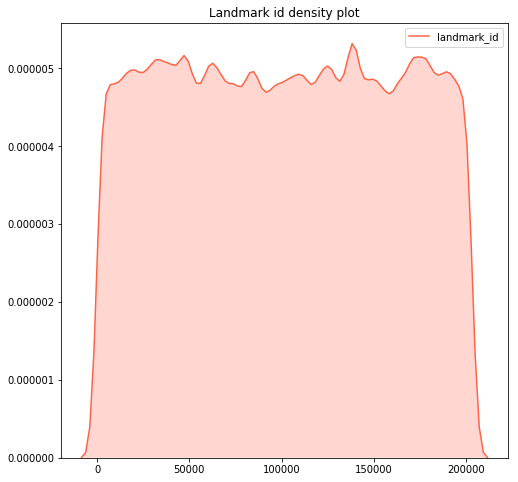

In [13]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id density plot')
sns.kdeplot(train_df['landmark_id'], color="tomato", shade=True)
plt.show()

Let's represent the same data as a density plot

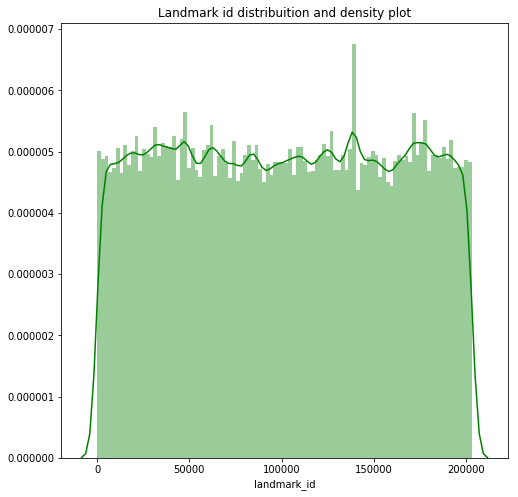

In [14]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id distribuition and density plot')
sns.distplot(train_df['landmark_id'],color='green', kde=True,bins=100)
plt.show()

Let's look now to the most frequent landmarks in the train set and also to the least frequent landmarks.

In [16]:
th10 = pd.DataFrame(train_df.landmark_id.value_counts().head(10))
th10.reset_index(level=0, inplace=True)
th10.columns = ['landmark_id','count']
th10

,landmark_id,count
0,138982,10247
1,62798,4333
2,177870,3327
3,176528,3243
4,192931,2627
5,126637,2589
6,83144,2351
7,171772,2268
8,20409,2248
9,151942,1727


Most frequent landmark has 50337 apparitions in train dataset.

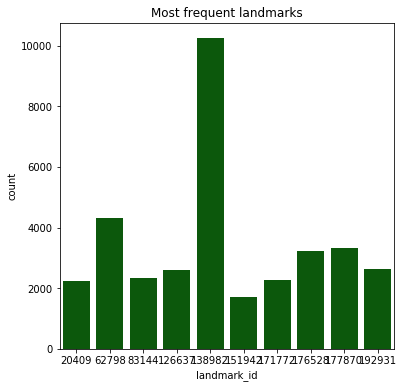

In [17]:
# Plot the most frequent landmark occurences
plt.figure(figsize = (6, 6))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=th10,
            label="Count", color="darkgreen")
plt.show()

In [18]:
tb10 = pd.DataFrame(train_df.landmark_id.value_counts().tail(10))
tb10.reset_index(level=0, inplace=True)
tb10.columns = ['landmark_id','count']
tb10

,landmark_id,count
0,131859,1
1,84859,1
2,22473,1
3,70512,1
4,127852,1
5,134828,1
6,139519,1
7,24520,1
8,17242,1
9,133954,1


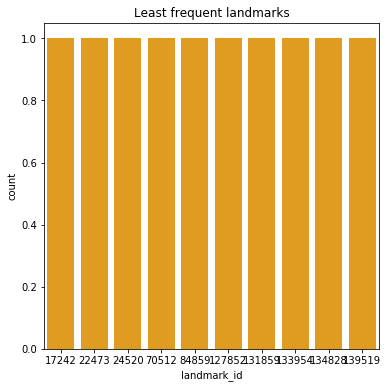

In [19]:
# Plot the least frequent landmark occurences
plt.figure(figsize = (6,6))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=tb10,
            label="Count", color="orange")
plt.show()

Least frequent landmarks have only one occurence in the train dataset.

# <a id="5">Image paths</a>

Let's check the image paths. When we first analyzed the images, we noticed that there are just few main repositories used. Let's try now to find the names of these repositories.

In [20]:
# Extract repositories names for train data
ll = list()
for path in train_df['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
train_df['site'] = ll
# Extract repositories names for test data
ll = list()
for path in test_df['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
test_df['site'] = ll

KeyError: 'url'

Let's check the shape again for train and test datasets.

In [ ]:
print("Train data shape -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Test data size -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

We added to train and test data sets one more column, `site`, storing the name of the image repository. Let's also glimpse the train and test again, to check on the new column values.

In [21]:
train_df.head()

,id,url,landmark_id,site
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820,upload.wikimedia.org
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169,upload.wikimedia.org
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914,upload.wikimedia.org
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140,upload.wikimedia.org
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474,upload.wikimedia.org


In [22]:
test_df.head()

,id
0,00016575233bc956
1,0001aadbcd8cb923
2,0002c06b2440a5f9
3,0002eb1ee5a5a6b2
4,000594dad986513e


Let's group now on `site` name. We process both the train and test data.

In [23]:
train_site = pd.DataFrame(train_df.site.value_counts())
test_site = pd.DataFrame(test_df.site.value_counts())

AttributeError: 'DataFrame' object has no attribute 'site'

The sites in train data are:

In [24]:
train_site

,site
upload.wikimedia.org,4132914


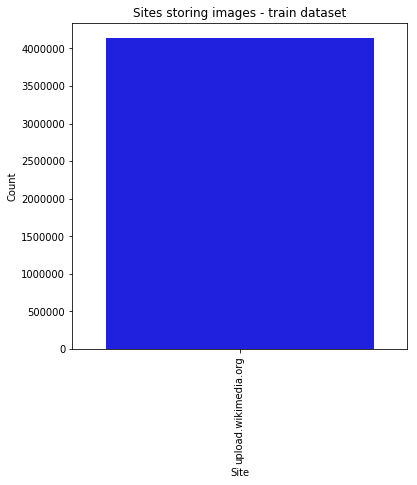

In [25]:
# Plot the site occurences in the train dataset
trsite = pd.DataFrame(list(train_site.index),train_site['site'])
trsite.reset_index(level=0, inplace=True)
trsite.columns = ['Count','Site']
plt.figure(figsize = (6,6))
plt.title('Sites storing images - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'Site', y="Count", data=trsite, color="blue")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

We can observe that most of the images in the train dataset are stored on 4 sites, *lh3.googleusercontent.com*, *lh4.googleusercontent.com*, *lh5.googleusercontent.com* and *lh6.googleusercontent.com*.

The sites in test dataset are:

In [26]:
test_site

NameError: name 'test_site' is not defined

In [27]:
# Plot the site occurences in the test dataset
tesite = pd.DataFrame(list(test_site.index),test_site['site'])
tesite.reset_index(level=0, inplace=True)
tesite.columns = ['Count','Site']
plt.figure(figsize = (6,6))
plt.title('Sites storing images - test dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'Site', y="Count", data=tesite, color="magenta")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

NameError: name 'test_site' is not defined

We can observe that most of the images in the test dataset are stored on one site, *lh3.googleusercontent.com*, which is also the one with most content stored for train dataset.
Let's look now to the images.

# <a id="6">Image thumbnails</a>

Let's inspect also the images. We create a function to display a certain number of images, giving a list of images urls. We show here a number of `50` images of the `Petronas Twin Towers` in Kuala Lumpur, which is the 5th ranged landmark in the selection of landmarks, based on number of occurences.

We will define two functions to display landmarks.


In [ ]:
def displayLandmarkImages(urls):
    
    imageStyle = "height: 60px; margin: 2px; float: left; border: 1px solid blue;"
    imagesList = ''.join([f"<img style='{imageStyle}' src='{u}' />" for _, u in urls.iteritems()])

    display(HTML(imagesList))
    
    
def displayLandmarkImagesLarge(urls):
    
    imageStyle = "height: 100px; margin: 2px; float: left; border: 1px solid blue;"
    imagesList = ''.join([f"<img style='{imageStyle}' src='{u}' />" for _, u in urls.iteritems()])

    display(HTML(imagesList))

In [ ]:
IMAGES_NUMBER = 50
landmarkId = train_df['landmark_id'].value_counts().keys()[5]
urls = train_df[train_df['landmark_id'] == landmarkId]['url'].head(IMAGES_NUMBER)
displayLandmarkImages(urls)

Let's visualize now 5 images for each of the first 5 landmarks, ordered by the number of occurences.

In [ ]:
LANDMARK_NUMBER = 5
IMAGES_NUMBER = 5
landMarkIDs = pd.Series(train_df['landmark_id'].value_counts().keys())[1:LANDMARK_NUMBER+1]
for landMarkID in landMarkIDs:
    url = train_df[train_df['landmark_id'] == landMarkID]['url'].head(IMAGES_NUMBER)
    displayLandmarkImagesLarge(url)


#  <a id="8">Baseline submission</a>

We are using a random guess, normalized by the frequency in the training set to prepare a submission file. The solution is picked up from Kevin Mader's Kernel, [Baseline Landmark Model](ttps://www.kaggle.com/kmader/baseline-landmark-model).


In [21]:
np.random.seed(2018)

# # take the most frequent label
# freq_label = train_df['landmark_id'].value_counts()/train_df['landmark_id'].value_counts().sum()

# # submit the most freq label
# # submission['landmarks'] = '%d %2.2f' % (freq_label.index[0], freq_label.values[0])
# submission['landmarks'] = '%d %2.2f' % (freq_label.index[0], freq_label.values[0])

# # submission.to_csv('freq_submission.csv', index=False)

# r_idx = lambda : np.random.choice(freq_label.index, p=freq_label.values)
# r_score = lambda idx: '%d %2.4f' % (freq_label.index[idx], freq_label.values[idx])
# submission['landmarks'] = submission.id.map(lambda _: r_score(r_idx()))
# submission.to_csv('rand_freq_submission.csv', index=False)

submission = pd.DataFrame(columns=['id', 'landmarks'])
submission['id'] = test_df['id']
# take the most frequent label
freq_label = train_df['landmark_id'].value_counts()/train_df['landmark_id'].value_counts().sum()

# submit the most freq label
submission['landmarks'] = '190039 0.1245964094996452' # '%d %2.2f' % (freq_label.index[0], freq_label.values[0])

submission.to_csv('freq_submission.csv', index=False)

# r_idx = lambda : np.random.choice(freq_label.index, p=freq_label.values)
# r_score = lambda idx: '%d %2.4f' % (freq_label.index[idx], freq_label.values[idx])
# submission['landmarks'] = submission.id.map(lambda _: r_score(r_idx()))
# submission.to_csv('rand_freq_submission.csv', index=False)

#  <a id="9">References</a>


[1] Max Diebold, Simple exploration of Google Recognition,  https://www.kaggle.com/mxdbld/simple-exploration-of-google-recognition  
[2] Ashok LathwalI, Introduction and overview,   https://www.kaggle.com/codename007/introduction-and-overview   
[3] Extract GPS & Exif Data from Images using Python, https://www.codingforentrepreneurs.com/blog/extract-gps-exif-images-python/  
[4] Python3 Dataset Downloader with progress bar, https://www.kaggle.com/anokas/python3-dataset-downloader-with-progress-bar  
[5] Kevin Mader, Baseline Landmark Model, https://www.kaggle.com/kmader/baseline-landmark-model  

